In [1]:
import requests
import pandas as pd
import numpy as np
import talib
import xgboost 
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import copy
import time
import threading
import pickle
from skynet.utils import utils
from skynet.utils import xgboost_ohlc
%matplotlib inline

In [2]:
#ohlc = utils.get_ohlc(periods=300,datasize=5000)
ohlc = pd.read_csv('skynet/bf-scraping/data_processed/5min.csv')
ohlc = ohlc.dropna()
ohlc, data_columns, target_columns = utils.shaping_ohlc(ohlc)
#print(data_columns)
print(target_columns)

['Target_Open', 'Target_high', 'Target_Low', 'Target_Close', 'TO/O', 'TH/O', 'TL/O', 'TC/O', 'TH/C', 'TL/C', 'TC/C', 'Class']


In [4]:
split_ind = ohlc.shape[0]-300
X_train = ohlc[data_columns][:split_ind]
y_r_train = ohlc['TC/C'][:split_ind]
y_c_train = ohlc['Class'][:split_ind]
X_test = ohlc[data_columns][split_ind:]
y_r_test = ohlc['TC/C'][split_ind:]
y_c_test = ohlc['Class'][split_ind:]

#xgbr = xgboost_ohlc.r_fit(X_train,y_r_train)
xgbc = xgboost_ohlc.c_fit(X_train,y_c_train)

#r_predict = xgbr.predict(X_test)
c_predict = xgbc.predict(X_test)

pickle.dump(xgbc, open("skynet/utils/xgbc_5min_2.pickle", "wb"))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 127.3min finished


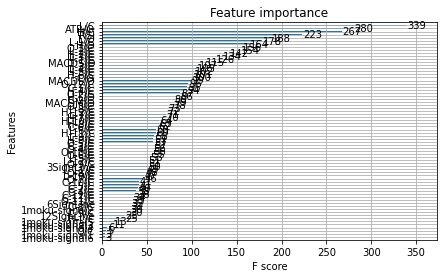

In [5]:
xgboost.plot_importance(xgbc)

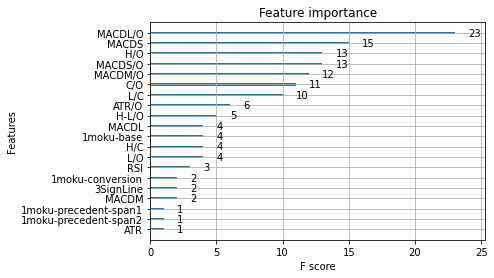

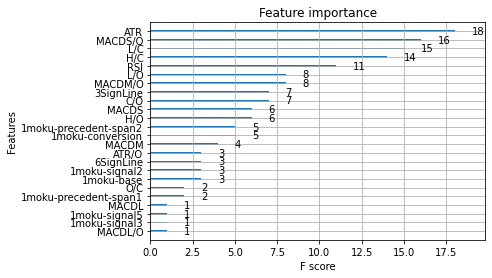

In [8]:
xgboost.plot_importance(xgbr)
xgboost.plot_importance(xgbc)

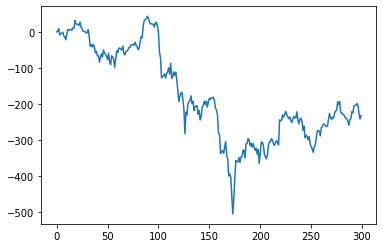

In [9]:
btc = 0
balance = [0]
for i in range(len(r_predict)-1):
    
    if 1 <= r_predict[i]:
        btc = 0.01
    else:
        btc = -0.01
        
    balance.append(balance[-1]+btc*(ohlc[split_ind:]['Close'].values[i+1]-ohlc[split_ind:]['Close'].values[i]))
        
plt.plot(balance)

In [7]:
#xgboostの誤差関数をシグモイド的なやつにしてもいいかもしれんね．符号が変わる地点で間違えるとペナを大きくする的な
#上がるか下がるかのclassifierやってみてもいいかも

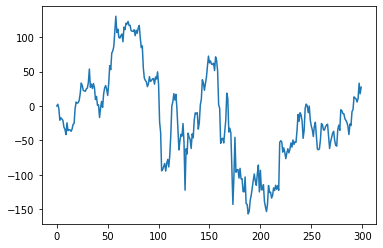

In [6]:
btc = 0
balance = [0]
for i in range(len(c_predict)-1):
    
    if 1 == c_predict[i]:
        btc = 0.01
    else:
        btc = -0.01
        
    balance.append(balance[-1]+btc*(ohlc[split_ind:]['Close'].values[i+1]-ohlc[split_ind:]['Close'].values[i]))
        
plt.plot(balance)

In [ ]:
#３択にするのありかも．regressor(long),regressor(short),calssifier

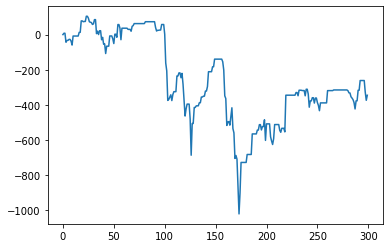

In [11]:
btc = 0
balance = [0]
for i in range(len(c_predict)-1):
    
    if 1 == c_predict[i] and r_predict[i] > 1:
        btc = 0.03
    elif c_predict[i] == 0 and r_predict[i] < 1:
        btc = -0.03
    elif c_predict[i] == 1:
        btc = 0#0.01
    else:
        btc = 0#-0.01
        
    balance.append(balance[-1]+btc*(ohlc[split_ind:]['Close'].values[i+1]-ohlc[split_ind:]['Close'].values[i]))
        
plt.plot(balance)

In [ ]:
####################################################################
#　モデルの保存とload
####################################################################

In [14]:
pickle.dump(xgbr, open("xgbr_5min.pickle", "wb"))
pickle.dump(xgbc, open("xgbc_5min.pickle", "wb"))

In [103]:
xgbc_model_loaded = pickle.load(open("xgbc_model_demo.pickle", "rb"))

In [96]:
loader_predict =  xgb_model_loaded.predict(X_test)

In [97]:
loader_predict == classifier_predict

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [16]:
xgbr_model_loaded = pickle.load(open("xgbr_5min.pickle", "rb"))
xgbr_model_loaded = pickle.load(open("xgbc_5min.pickle", "rb"))

In [ ]:
####################################################################
#　メモリ確認
####################################################################

In [ ]:
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_"):
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

In [112]:
pd.concat([X_train,X_test])
sdsd = []
for t in pd.concat([X_train, X_test])

,O/O,H/O,L/O,C/O,H-L/O,SignLine,3SignLine,6SignLine,12SignLine,MACDS,...,1moku-base,1moku-conversion,1moku-precedent-span1,1moku-precedent-span2,1moku-signal1,1moku-signal2,1moku-signal3,1moku-signal4,1moku-signal5,1moku-signal6
77,1.0,1.000808,0.999058,1.000131,0.001749,1,1.0,2.0,4.0,649.454534,...,1160679.5,1165531.5,1165986.50,1170057.0,0.0,1,0.0,0,1.0,1
78,1.0,1.002438,0.999344,1.002247,0.003094,1,3.0,2.0,4.0,1001.756161,...,1160679.5,1165531.5,1165986.50,1170057.0,0.0,1,0.0,0,-1.0,0
79,1.0,1.000464,0.998810,0.999553,0.001653,-1,1.0,2.0,4.0,1099.699888,...,1160679.5,1165531.5,1165986.50,1170057.0,0.0,1,0.0,0,0.0,0
80,1.0,1.000201,0.998397,0.999883,0.001803,-1,-1.0,0.0,2.0,1104.129430,...,1160679.5,1165531.5,1165167.25,1170057.0,0.0,1,0.0,0,0.0,0
81,1.0,1.000887,0.999130,0.999570,0.001757,-1,-3.0,0.0,2.0,991.487581,...,1160679.5,1164838.5,1163758.25,1170057.0,0.0,1,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,1.0,1.001398,0.999775,1.000667,0.001623,1,1.0,0.0,0.0,-81.958530,...,1267450.5,1266573.0,1266354.00,1263073.0,0.0,0,0.0,1,0.0,0
4945,1.0,1.001294,0.999835,1.001128,0.001458,1,1.0,2.0,2.0,264.379528,...,1267384.5,1268221.5,1266449.00,1263073.0,1.0,1,0.0,1,0.0,0
4946,1.0,1.000395,0.999053,0.999349,0.001343,-1,1.0,0.0,2.0,310.100293,...,1267384.5,1268710.0,1266471.25,1263073.0,0.0,1,0.0,1,0.0,0
4947,1.0,1.000190,0.997364,0.997670,0.002826,-1,-1.0,0.0,2.0,-232.824937,...,1267384.5,1268036.5,1266976.50,1263073.0,0.0,1,-1.0,0,0.0,0


In [ ]:
####################################################################
#　テストスペース
####################################################################

In [2]:
ohlc = utils.get_ohlc(periods=300,datasize=5000)
ohlc,data_columns,target_columns = utils.shaping_ohlc(ohlc)
ohlc

,timestamp,Open,High,Low,Close,O/O,H/O,L/O,C/O,O/C,...,Target_Low,Target_Close,TO/O,TH/O,TL/O,TC/O,TH/C,TL/C,TC/C,Class
77,1.597503e+09,1268999.0,1271187.0,1268425.0,1270786.0,1.0,1.001724,0.999548,1.001408,0.998594,...,1270001.0,1270980.0,1.001442,1.001894,1.000790,1.001561,1.000485,0.999382,1.000153,1
78,1.597503e+09,1270829.0,1271402.0,1270001.0,1270980.0,1.0,1.000451,0.999348,1.000119,0.999881,...,1269258.0,1269532.0,1.000224,1.000231,0.998764,0.998979,1.000113,0.998645,0.998861,0
79,1.597503e+09,1271114.0,1271123.0,1269258.0,1269532.0,1.0,1.000007,0.998540,0.998755,1.001246,...,1267480.0,1267720.0,0.998719,0.998810,0.997141,0.997330,1.000055,0.998384,0.998573,0
80,1.597504e+09,1269486.0,1269602.0,1267480.0,1267720.0,1.0,1.000091,0.998420,0.998609,1.001393,...,1266165.0,1267060.0,0.998601,0.998671,0.997384,0.998089,1.000062,0.998773,0.999479,0
81,1.597504e+09,1267710.0,1267799.0,1266165.0,1267060.0,1.0,1.000070,0.998781,0.999487,1.000513,...,1266998.0,1267844.0,0.999508,1.001263,0.999438,1.000106,1.001777,0.999951,1.000619,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,1.598978e+09,1288423.0,1289039.0,1286117.0,1288077.0,1.0,1.000478,0.998210,0.999731,1.000269,...,1286783.0,1286957.0,0.999728,1.000569,0.998727,0.998862,1.000838,0.998995,0.999130,0
4801,1.598978e+09,1288072.0,1289156.0,1286783.0,1286957.0,1.0,1.000842,0.998999,0.999134,1.000866,...,1286957.0,1289390.0,0.999134,1.001071,0.999134,1.001023,1.001938,1.000000,1.001891,1
4802,1.598978e+09,1286957.0,1289451.0,1286957.0,1289390.0,1.0,1.001938,1.000000,1.001891,0.998113,...,1288781.0,1289370.0,1.001891,1.002643,1.001417,1.001875,1.000752,0.999528,0.999984,0
4803,1.598979e+09,1289390.0,1290359.0,1288781.0,1289370.0,1.0,1.000752,0.999528,0.999984,1.000016,...,1288047.0,1288284.0,0.999973,1.000330,0.998958,0.999142,1.000346,0.998974,0.999158,0


In [3]:
len(data_columns)

75

In [4]:
data_columns

['O/O',
 'H/O',
 'L/O',
 'C/O',
 'O/C',
 'H/C',
 'L/C',
 'C/C',
 'H-L/O',
 'H-L/C',
 'O-1/C',
 'H-1/C',
 'L-1/C',
 'C-1/C',
 'O-2/C',
 'H-2/C',
 'L-2/C',
 'C-2/C',
 'O-3/C',
 'H-3/C',
 'L-3/C',
 'C-3/C',
 'O-4/C',
 'H-4/C',
 'L-4/C',
 'C-4/C',
 'O-5/C',
 'H-5/C',
 'L-5/C',
 'C-5/C',
 'O-6/C',
 'H-6/C',
 'L-6/C',
 'C-6/C',
 'O-7/C',
 'H-7/C',
 'L-7/C',
 'C-7/C',
 'O-8/C',
 'H-8/C',
 'L-8/C',
 'C-8/C',
 'O-9/C',
 'H-9/C',
 'L-9/C',
 'C-9/C',
 'O-10/C',
 'H-10/C',
 'L-10/C',
 'C-10/C',
 'O-11/C',
 'H-11/C',
 'L-11/C',
 'C-11/C',
 'O-12/C',
 'H-12/C',
 'L-12/C',
 'C-12/C',
 'PositiveLine',
 'NegativeLine',
 'SignLine',
 '3SignLine',
 '6SignLine',
 '12SignLine',
 'MACDS/O',
 'MACDM/O',
 'MACDL/O',
 'ATR/O',
 'RSI',
 '1moku-signal1',
 '1moku-signal2',
 '1moku-signal3',
 '1moku-signal4',
 '1moku-signal5',
 '1moku-signal6']

In [20]:
len(target_columns)

12

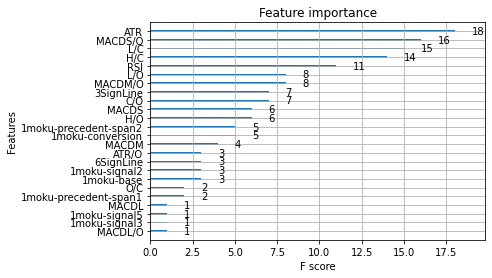

In [32]:
xgboost.plot_importance(xgbc_model_loaded)

In [26]:
ohlc = utils.get_ohlc(periods=300,datasize=500)
ohlc, data_columns, target_columns = utils.shaping_ohlc(ohlc,drop=False)

In [2]:
ohlc = utils.get_ohlc(periods=60,datasize=500)

NameError: name 'utils' is not defined